# **E-Commerce Data Insights**
**Problem Statement:**


*E-commerce platforms need to know what products and users drive revenue.*


**Objective:**


*Explore sales and user data to derive business insights.*

**Requirements:**


*Dataset: products, users, order quantity, reviewsAnalyze top-selling items, peak hours, user retentionVisualize using bar, pie, line charts*


**Expected Outcome:**

*Insights dashboard showing products to stock, users to reward.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/e-commerce-transactions-dataset/ecommerce_transactions.csv')

# Objectives
## No ML
## Only EDA
  ### Tell which categories brings the most revenue
  ### Tell what customers boughts the most amounts of items

In [3]:
df.isnull().sum()

Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

In [4]:
df.dtypes

Transaction_ID        int64
User_Name            object
Age                   int64
Country              object
Product_Category     object
Purchase_Amount     float64
Payment_Method       object
Transaction_Date     object
dtype: object

In [5]:
df['Tran_day']=pd.to_datetime(df['Transaction_Date']).dt.day.astype(str)
df['Tran_month']=pd.to_datetime(df['Transaction_Date']).dt.month.astype(str)
df['Transaction_Date'].astype(str)

0        2023-04-14
1        2023-07-30
2        2023-09-17
3        2023-06-21
4        2024-10-29
            ...    
49995    2024-08-07
49996    2025-02-07
49997    2023-08-11
49998    2025-01-02
49999    2024-06-03
Name: Transaction_Date, Length: 50000, dtype: object

In [6]:
num=df.select_dtypes(include=['number']).columns.tolist()
cat=df.select_dtypes(include=['object']).columns.tolist()

<Axes: xlabel='Age', ylabel='Count'>

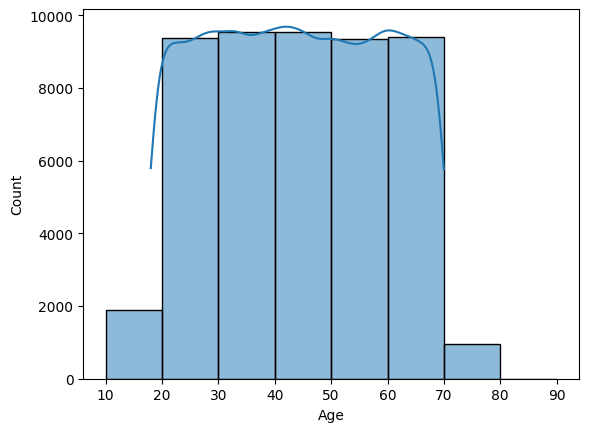

In [7]:
bin=[10,20,30,40,50,60,70,80,90]
sns.histplot(x='Age',data=df,kde=True,bins=bin)

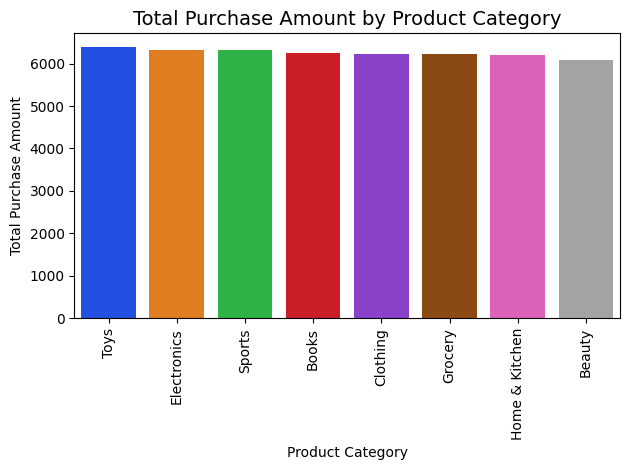

In [8]:
cat_by_amount=df.groupby('Product_Category')['Purchase_Amount'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='Product_Category',y='Purchase_Amount',data=cat_by_amount,palette='bright')
plt.xticks(rotation=90)
plt.title('Total Purchase Amount by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.tight_layout()
plt.show()

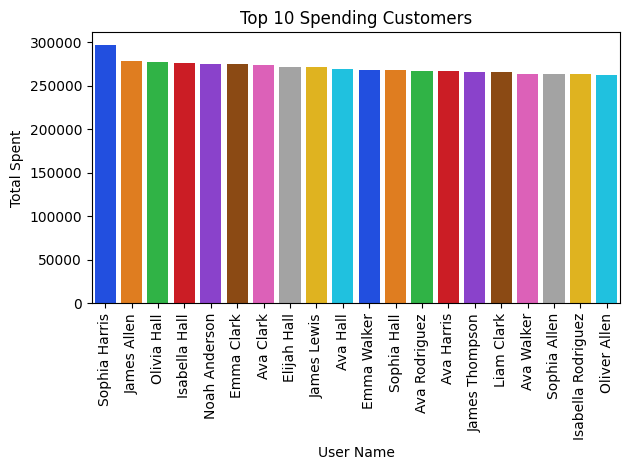

In [9]:
top_customers = df.groupby('User_Name')['Purchase_Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='User_Name', y='Purchase_Amount', data=top_customers.head(20), palette='bright')
plt.title("Top 10 Spending Customers")
plt.xlabel("User Name")
plt.ylabel("Total Spent")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

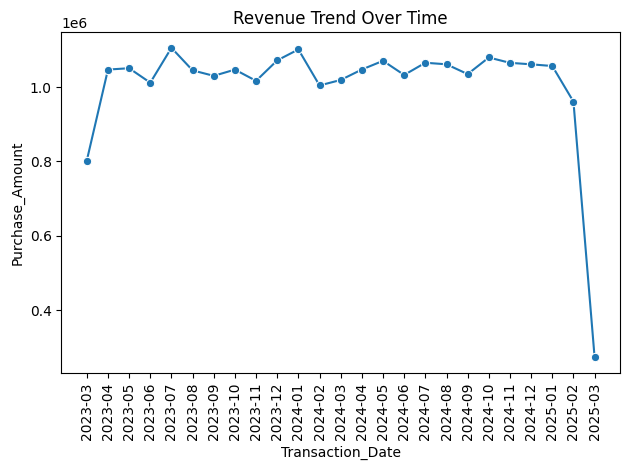

In [10]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
monthly = df.groupby(df['Transaction_Date'].dt.to_period("M"))['Purchase_Amount'].sum().reset_index()
monthly['Transaction_Date'] = monthly['Transaction_Date'].astype(str)
sns.lineplot(data=monthly, x='Transaction_Date', y='Purchase_Amount', marker='o')
plt.title("Revenue Trend Over Time")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top revenue-generating category per country:
      Country Product_Category  Purchase_Amount
4   Australia          Grocery        335303.16
10     Brazil         Clothing        333614.47
17     Canada            Books        340734.15
26     France         Clothing        331622.23
38    Germany           Sports        326127.36
43      India      Electronics        329364.17
48      Japan           Beauty        323443.64
63     Mexico             Toys        339836.63
70         UK           Sports        334038.64
77        USA   Home & Kitchen        328129.75


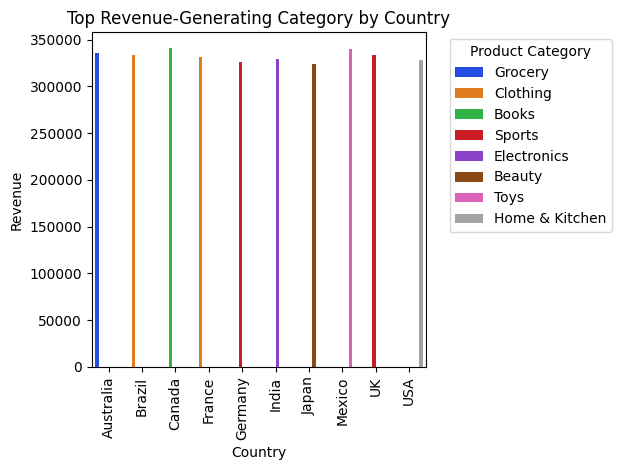

In [11]:
country_category = df.groupby(['Country', 'Product_Category'])['Purchase_Amount'].sum().reset_index()
top_per_country = country_category.sort_values(['Country', 'Purchase_Amount'], ascending=[True, False])
top_categories_by_country = top_per_country.drop_duplicates(subset=['Country'], keep='first')
print("Top revenue-generating category per country:")
print(top_categories_by_country)
sns.barplot(x='Country', y='Purchase_Amount', hue='Product_Category', data=top_categories_by_country, palette='bright')
plt.title("Top Revenue-Generating Category by Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/e-commerce-transactions-dataset/ecommerce_transactions.csv')

df = pd.get_dummies(df)

X = df.drop(columns=['Purchase_Amount']).values
y = df['Purchase_Amount'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

lr = 0.01
epochs = 10
w = np.zeros(X.shape[1])
b = 0

for epoch in range(epochs):
    y_pred = np.dot(X, w) + b
    error = y - y_pred
    
    grad_w = -2 * np.dot(X.T, error) / len(X)
    grad_b = -2 * np.sum(error) / len(X)
    
    w -= lr * grad_w
    b -= lr * grad_b
    
    loss = np.mean(error ** 2)
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}, b = {b:.4f}")


Epoch 1: Loss = 335286.8075, b = 10.0632
Epoch 2: Loss = 325204.5039, b = 19.9251
Epoch 3: Loss = 315521.5083, b = 29.5898
Epoch 4: Loss = 306222.0054, b = 39.0612
Epoch 5: Loss = 297290.8066, b = 48.3432
Epoch 6: Loss = 288713.3247, b = 57.4395
Epoch 7: Loss = 280475.5504, b = 66.3539
Epoch 8: Loss = 272564.0290, b = 75.0900
Epoch 9: Loss = 264965.8391, b = 83.6514
Epoch 10: Loss = 257668.5709, b = 92.0416
